# Final Project - Methods and Results (STAT 301)

## (a) Data

In [1]:
# Load required packages
library(tidyverse)
library(broom)
library(car)
library(MASS)
library(ggplot2)

Warning message:
“package ‘lubridate’ was built under R version 4.4.2”
── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors
Loading required package: carData


Attaching package: ‘car’


The following object is masked from ‘package:dplyr’:

    recode


The following object is masked from ‘package:purrr’:

    some



Attaching package: ‘MASS’


The following object is masked from ‘package:dplyr’:

    select




In [2]:
# Load dataset from GitHub (reproducible)
data_url <- "https://raw.githubusercontent.com/Sethu645/STAT-301-Project/main/Restaurant_revenue%20(1).csv"
restaurant_data <- read_csv(data_url)

# View structure of the data
glimpse(restaurant_data)

Rows: 1000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): Cuisine_Type
dbl (7): Number_of_Customers, Menu_Price, Marketing_Spend, Average_Customer_...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


Rows: 1,000
Columns: 8
$ Number_of_Customers       <dbl> 61, 24, 81, 70, 30, 92, 96, 84, 84, 97, 33, …
$ Menu_Price                <dbl> 43.11764, 40.02008, 41.98149, 43.00531, 17.4…
$ Marketing_Spend           <dbl> 12.663793, 4.577892, 4.652911, 4.416053, 3.4…
$ Cuisine_Type              <chr> "Japanese", "Italian", "Japanese", "Italian"…
$ Average_Customer_Spending <dbl> 36.23613, 17.95256, 22.60042, 18.98410, 12.7…
$ Promotions                <dbl> 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0,…
$ Reviews                   <dbl> 45, 36, 91, 59, 30, 10, 86, 1, 26, 98, 1, 20…
$ Monthly_Revenue           <dbl> 350.91204, 221.31909, 326.52976, 348.19057, …


**Source & Citation:**
The dataset is a synthetic Restaurant Revenue Prediction Dataset created by MrSimple07 (2024), hosted on GitHub. [GitHub Link](https://github.com/MrSimple07/STAT-301-Dataset)

**Collection Type:** This is a simulated dataset created for educational purposes. It mimics observational data.

**Variables:**
- `Number_of_Customers`: Count (Response variable)
- `Menu_Price`: Continuous
- `Marketing_Spend`: Continuous
- `Cuisine_Type`: Categorical (Italian, Mexican, Japanese, American)
- `Promotions`: Binary (0 or 1)
- `Reviews`: Count

Two variables (`Average_Customer_Spending` and `Monthly_Revenue`) were removed for reasons stated in Part 1.

## (b) Exploratory Data Analysis (EDA)

In [3]:
# Check for missing values
colSums(is.na(restaurant_data))

Number_of_Customers                Menu_Price           Marketing_Spend 
                        0                         0                         0 
             Cuisine_Type Average_Customer_Spending                Promotions 
                        0                         0                         0 
                  Reviews           Monthly_Revenue 
                        0                         0

In [4]:
# Summary statistics
df_summary <- restaurant_data %>% 
  dplyr::select(-Average_Customer_Spending, -Monthly_Revenue) %>%
  summary()
df_summary

 Number_of_Customers   Menu_Price    Marketing_Spend     Cuisine_Type      
 Min.   :10.00       Min.   :10.01   Min.   : 0.003768   Length:1000       
 1st Qu.:30.00       1st Qu.:20.40   1st Qu.: 4.690724   Class :character  
 Median :54.00       Median :30.86   Median :10.092047   Mode  :character  
 Mean   :53.27       Mean   :30.22   Mean   : 9.958726                     
 3rd Qu.:74.00       3rd Qu.:39.84   3rd Qu.:14.992436                     
 Max.   :99.00       Max.   :49.97   Max.   :19.994276                     
   Promotions       Reviews     
 Min.   :0.000   Min.   : 0.00  
 1st Qu.:0.000   1st Qu.:24.00  
 Median :0.000   Median :50.00  
 Mean   :0.497   Mean   :49.84  
 3rd Qu.:1.000   3rd Qu.:76.00  
 Max.   :1.000   Max.   :99.00  

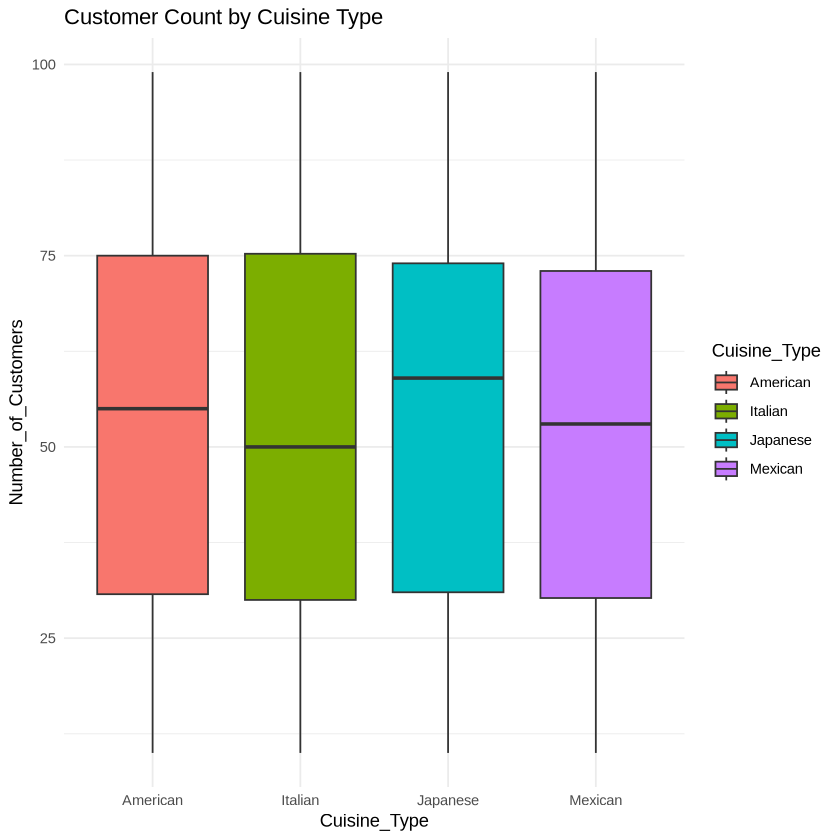

In [5]:
# Visualization 1: Boxplot of Number of Customers by Cuisine Type
ggplot(restaurant_data, aes(x = Cuisine_Type, y = Number_of_Customers, fill = Cuisine_Type)) +
  geom_boxplot() + theme_minimal() + labs(title = "Customer Count by Cuisine Type")

`geom_smooth()` using formula = 'y ~ x'


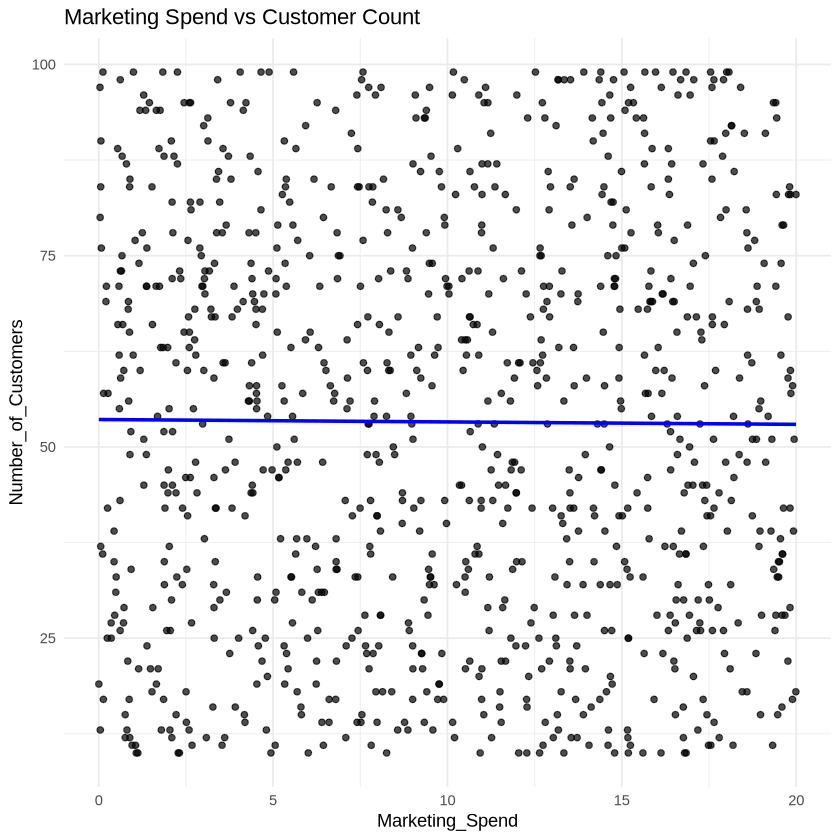

In [6]:
# Visualization 2: Scatterplot of Marketing Spend vs Number of Customers
ggplot(restaurant_data, aes(x = Marketing_Spend, y = Number_of_Customers)) +
  geom_point(alpha = 0.7) + theme_minimal() +
  geom_smooth(method = "lm", se = FALSE, color = "blue") +
  labs(title = "Marketing Spend vs Customer Count")

## (c) Methods: Plan

We aim to assess the **associations** between the number of customers and several restaurant characteristics. Because the response variable is a **count**, a **Poisson regression model** is appropriate.

**Justification:** Poisson regression is suitable for modeling count data assuming the mean and variance are approximately equal.

We will examine the following covariates: `Menu_Price`, `Marketing_Spend`, `Cuisine_Type`, `Promotions`, and `Reviews`.

In [7]:
# Fit Poisson regression model
model <- glm(Number_of_Customers ~ Menu_Price + Marketing_Spend + 
             Cuisine_Type + Promotions + Reviews, 
           data = restaurant_data, family = poisson())
summary(model)


Call:
glm(formula = Number_of_Customers ~ Menu_Price + Marketing_Spend + 
    Cuisine_Type + Promotions + Reviews, family = poisson(), 
    data = restaurant_data)

Coefficients:
                       Estimate Std. Error z value Pr(>|z|)    
(Intercept)           3.9187125  0.0186653 209.946  < 2e-16 ***
Menu_Price            0.0014216  0.0003857   3.686 0.000228 ***
Marketing_Spend      -0.0005478  0.0007444  -0.736 0.461787    
Cuisine_TypeItalian  -0.0090509  0.0124685  -0.726 0.467899    
Cuisine_TypeJapanese  0.0138716  0.0120047   1.156 0.247882    
Cuisine_TypeMexican  -0.0131273  0.0122179  -1.074 0.282627    
Promotions            0.0576231  0.0086851   6.635 3.25e-11 ***
Reviews              -0.0001672  0.0001488  -1.124 0.261186    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for poisson family taken to be 1)

    Null deviance: 14150  on 999  degrees of freedom
Residual deviance: 14084  on 992  degrees of freedom
AIC: 19756

N

In [8]:
# Tidy the model output
tidy(model, exponentiate = TRUE, conf.int = TRUE)

term,estimate,std.error,statistic,p.value,conf.low,conf.high
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
(Intercept),50.3355961,0.0186653108,209.9462761,0.000000e+00,48.5256022,52.209252
Menu_Price,1.0014226,0.0003856571,3.6861864,2.276396e-04,1.0006660,1.002180
Marketing_Spend,0.9994524,0.0007443627,-0.7359076,4.617869e-01,0.9979953,1.000912
Cuisine_TypeItalian,0.9909899,0.0124685155,-0.7259012,4.678993e-01,0.9670597,1.015501
Cuisine_TypeJapanese,1.0139683,0.0120047444,1.1555093,2.478819e-01,0.9903900,1.038111
Cuisine_TypeMexican,0.9869585,0.0122178702,-1.0744368,2.826270e-01,0.9636026,1.010877
Promotions,1.0593156,0.0086850834,6.6347175,3.251246e-11,1.0414368,1.077504
Reviews,0.9998328,0.0001488064,-1.1235934,2.611856e-01,0.9995412,1.000124


In [9]:
# Goodness of fit: Residual deviance
model$deviance / model$df.residual

[1] 14.19805

**Interpretation:**
- Coefficients represent multiplicative changes in the expected number of customers.
- We focus on statistically significant predictors (e.g., p < 0.05).
- A deviance/df ratio close to 1 indicates a decent fit. If much larger, consider overdispersion.

## (d) Predictive Modeling: Lasso Regression

**Why Lasso?**
Lasso is a regularization method that helps in variable selection by shrinking some coefficients to zero. It's commonly used for **prediction tasks**. While not directly suited for inference, it helps identify important variables.

Here, we split the data into training and test sets, then fit a Lasso regression model using cross-validation.

In [10]:
# Load additional library
library(glmnet)

Loading required package: Matrix


Attaching package: ‘Matrix’


The following objects are masked from ‘package:tidyr’:

    expand, pack, unpack


Loaded glmnet 4.1-8



In [11]:
# Prepare data: remove unused columns and convert categorical vars
set.seed(123)
data_lasso <- restaurant_data %>% 
  dplyr::select(Number_of_Customers, Menu_Price, Marketing_Spend, Cuisine_Type, Promotions, Reviews)

# One-hot encode categorical variables
x <- model.matrix(Number_of_Customers ~ . , data = data_lasso)[, -1]  # drop intercept
y <- data_lasso$Number_of_Customers

# Train-test split
n <- nrow(x)
train_idx <- sample(1:n, size = 0.8 * n)
x_train <- x[train_idx, ]
y_train <- y[train_idx]
x_test <- x[-train_idx, ]
y_test <- y[-train_idx]

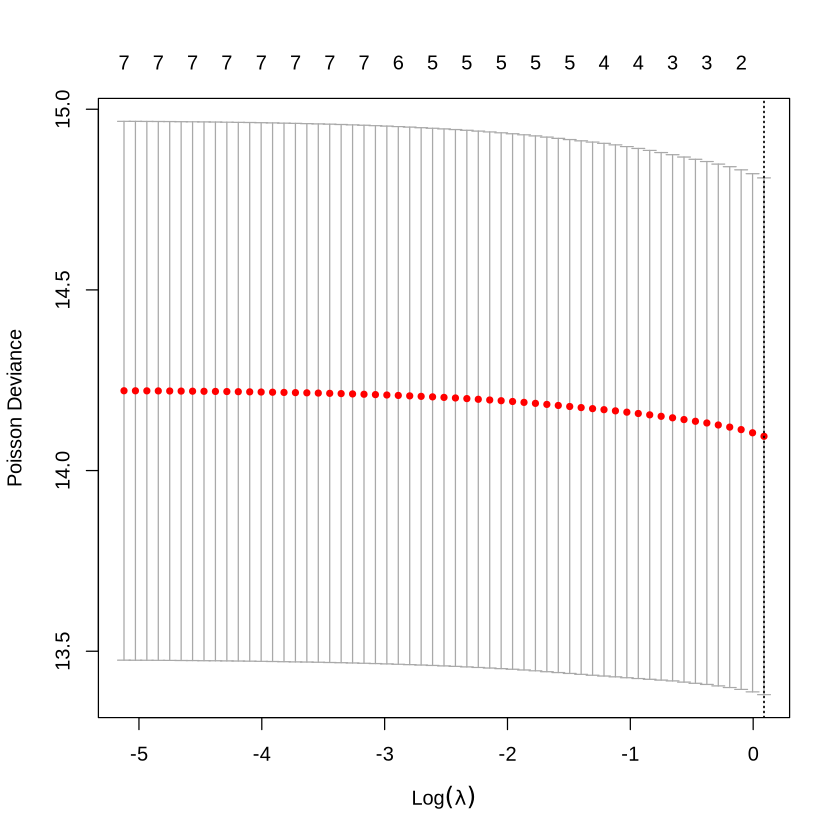

In [12]:
# Fit Lasso model using cross-validation
cv_lasso <- cv.glmnet(x_train, y_train, alpha = 1, family = 'poisson')
plot(cv_lasso)

In [13]:
# Best lambda value
cv_lasso$lambda.min

[1] 1.092147

In [14]:
# Coefficients from the Lasso model
coef(cv_lasso, s = "lambda.min")

8 x 1 sparse Matrix of class "dgCMatrix"
                           s1
(Intercept)          3.972977
Menu_Price           .       
Marketing_Spend      .       
Cuisine_TypeItalian  .       
Cuisine_TypeJapanese .       
Cuisine_TypeMexican  .       
Promotions           .       
Reviews              .       

In [15]:
# Predict on test data and calculate RMSE
preds <- predict(cv_lasso, newx = x_test, s = "lambda.min", type = "response")
rmse <- sqrt(mean((y_test - preds)^2))
rmse

[1] 26.76867

**Interpretation:**
- Lasso selected a subset of variables by shrinking others to zero.
- The RMSE helps us evaluate predictive performance on unseen data.
- While useful for variable selection, Lasso coefficients are biased and not ideal for inference.
- A better inferential method after Lasso is 'post-lasso', where we refit a standard model on selected variables.

## (e) Model Diagnostics: Overdispersion Check

We assess whether the Poisson model exhibits **overdispersion**, which occurs when the variance exceeds the mean. In such cases, a **quasi-Poisson** model can be used as a robust alternative that adjusts the standard errors.

In [16]:
# Fit a quasi-Poisson model
model_quasi <- glm(Number_of_Customers ~ Menu_Price + Marketing_Spend + 
                    Cuisine_Type + Promotions + Reviews, 
                  data = restaurant_data, family = quasipoisson())
summary(model_quasi)


Call:
glm(formula = Number_of_Customers ~ Menu_Price + Marketing_Spend + 
    Cuisine_Type + Promotions + Reviews, family = quasipoisson(), 
    data = restaurant_data)

Coefficients:
                       Estimate Std. Error t value Pr(>|t|)    
(Intercept)           3.9187125  0.0675928  57.975   <2e-16 ***
Menu_Price            0.0014216  0.0013966   1.018   0.3090    
Marketing_Spend      -0.0005478  0.0026956  -0.203   0.8390    
Cuisine_TypeItalian  -0.0090509  0.0451523  -0.200   0.8412    
Cuisine_TypeJapanese  0.0138716  0.0434728   0.319   0.7497    
Cuisine_TypeMexican  -0.0131273  0.0442446  -0.297   0.7668    
Promotions            0.0576231  0.0314513   1.832   0.0672 .  
Reviews              -0.0001672  0.0005389  -0.310   0.7564    
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

(Dispersion parameter for quasipoisson family taken to be 13.11384)

    Null deviance: 14150  on 999  degrees of freedom
Residual deviance: 14084  on 992  degrees of free

In [17]:
# Calculate dispersion statistic for Poisson model
dispersion_stat <- model$deviance / model$df.residual
dispersion_stat

[1] 14.19805

**Interpretation of Overdispersion:**
- If the dispersion statistic is considerably >1, it suggests overdispersion.
- The quasi-Poisson model corrects the standard errors but keeps the same coefficient estimates.
- We report both models if inference is impacted by the change in standard errors.